In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# Square matrix

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random_sample((N, D)) - 0.5)*10

X
X.shape

(50, 50)

In [89]:
# create outliers 
X[1] += 30
#X[-2] += 10

In [90]:
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
true_w

array([ 1. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [91]:
# generate Y - add noise
Y = X.dot(true_w) + np.random.randn(N)*0.5
Y.shape

(50,)

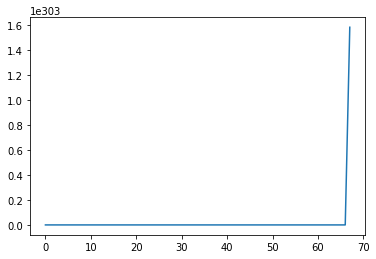

In [92]:
# gradient descent

costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001  
L1 = 10       # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?

for t in range(100): 
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + L1*np.sign(w))
    
    # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)

# plot the costs
plt.plot(costs)

final w: [-2.79232368e+223 -2.73734041e+223 -2.54966621e+223 -2.79958045e+223
 -2.50944630e+223 -2.77191091e+223 -2.62104377e+223 -2.93535770e+223
 -2.52487212e+223 -2.87364813e+223 -2.75251225e+223 -2.52398635e+223
 -2.75731914e+223 -2.55284518e+223 -2.92700103e+223 -2.51758048e+223
 -2.66888189e+223 -2.67435777e+223 -2.81262459e+223 -2.54020020e+223
 -2.78390852e+223 -2.65133724e+223 -2.87829655e+223 -2.92996181e+223
 -2.76697915e+223 -2.66312670e+223 -2.49775471e+223 -2.67987643e+223
 -2.74866922e+223 -2.88783724e+223 -2.75081130e+223 -2.65866902e+223
 -2.94165550e+223 -2.83132599e+223 -2.71402227e+223 -2.91966398e+223
 -2.90873144e+223 -2.92150801e+223 -2.68339828e+223 -2.52771096e+223
 -2.90206990e+223 -2.74110364e+223 -2.82643738e+223 -2.64599632e+223
 -2.67360444e+223 -2.56039748e+223 -2.89018465e+223 -2.64211003e+223
 -2.67968804e+223 -2.77511295e+223]


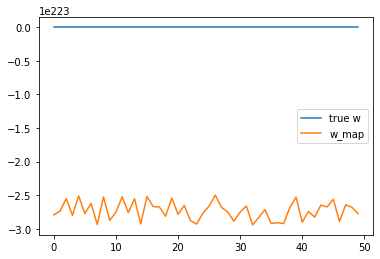

In [93]:
print("final w:", w)

# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()